#**1.Data Processing for Machine Learning**

#####**Importing required libraries**

In [146]:
!pip install --upgrade scikit-learn -q --user

In [147]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder,PolynomialFeatures, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate, GridSearchCV,RandomizedSearchCV

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold,SelectKBest, f_regression, RFE, SelectFromModel
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LassoCV,Ridge

import shap
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor,VotingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error ,r2_score

from scipy.stats import randint as sp_randint
from sklearn.base import BaseEstimator, TransformerMixin

import matplotlib.ticker as ticker


#####**Loading the dataset**

In [4]:
url = "https://raw.githubusercontent.com/nehahussain/AdvanceML_dataset/master/adverts.csv"
df = pd.read_csv(url)

In [5]:
df.head()


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [6]:
print("\nTotal no. of columns: "+str(df.shape[1]) + "\nTotal no. of rows: " + str(df.shape[0]))
print(df.info())


Total no. of columns: 12
Total no. of rows: 402005
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB
None


###**Detection of Erroneous, Missing Values and Outliers**

In [7]:
# it shows us which column has null values
df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

#####**Public reference**

In [8]:
#it shows us if the values are unique
pd.Series(df['public_reference']).is_unique

True

This is a 15-digit integer value in the dataset. Every record has a unique value. This value could be the ad reference value that allows to uniquely identify each advertisement at AutoTrader.

#####**Mileage**

In [9]:
dummy = df.sort_values('mileage', ascending=False)
dummy.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
43974,202008122406434,999999.0,63,White,Vauxhall,Astra,USED,2013.0,9999,Hatchback,False,Diesel
63569,202010235350884,990000.0,07,Red,Vauxhall,Zafira,USED,2007.0,1200,MPV,False,Diesel
85043,202010285542410,930000.0,56,Blue,BMW,1 Series,USED,2006.0,2500,Hatchback,False,Petrol
131508,202010064664710,788072.0,68,Blue,MINI,Countryman,USED,2018.0,22875,SUV,False,Petrol
115277,202010215262290,740000.0,14,Blue,Volvo,XC90,USED,2014.0,14795,SUV,False,Diesel


In [10]:
len(dummy[dummy['mileage']>200000])

341

- The highest mileage value is 999,999, which could be an outlier or an erroneous data point. Similarly, there are other high mileage values like 990,000 and 930,000 that could also be outliers or errors.
- According to the AutoTrader website the max mileage option we could choose while buying is upto 200000. https://www.autotrader.co.uk/search-form?moreOptions=visible&&advertising-location=at_cars 
- And while selling the max mileage we could enter is also 200000, otherwise its invalid https://www.autotrader.co.uk/instant-offer
- This suggests that the platform considers cars with over 200,000 miles as outliers or less relevant for their customers.
- There are also some missing values in the 'mileage' column, represented by NaN


In [11]:
dummy = df.sort_values('mileage')
dummy.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
376481,202009163819142,0.0,NaN,Black,Volkswagen,Polo,NEW,NaN,17401,Hatchback,False,Petrol
11081,202007101107807,0.0,NaN,Black,Volvo,XC60,NEW,NaN,57645,SUV,False,Petrol Plug-in Hybrid
11082,202007221536420,0.0,NaN,White,Vauxhall,Grandland X,NEW,NaN,45995,SUV,False,Petrol Plug-in Hybrid
32906,202003278771163,0.0,NaN,White,Renault,Megane,NEW,NaN,63500,Hatchback,False,Petrol


In [12]:
dummy[(dummy['vehicle_condition']=='USED') & (dummy['mileage']==0.0)]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
326023,202010074722783,0.0,70,White,Hyundai,i30,USED,NaN,21980,Hatchback,False,NaN
376746,202007010712411,0.0,20,Black,Mercedes-Benz,C Class,USED,2020.0,35980,Saloon,False,Petrol Plug-in Hybrid
186936,202006150139552,0.0,70,Blue,Renault,Zoe,USED,2020.0,25995,Hatchback,False,Electric
187141,202010165060084,0.0,70,Grey,Audi,Q2,USED,2020.0,28000,SUV,False,Petrol
376156,202009214008819,0.0,70,Brown,Kia,Ceed,USED,2020.0,16999,Hatchback,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
47104,202010014429171,0.0,70,Black,Volkswagen,Passat,USED,2020.0,20000,Saloon,False,Diesel
78610,202010155019944,0.0,70,Silver,Nissan,Navara,USED,2020.0,23369,Pickup,True,Diesel
217295,202008122387274,0.0,70,Orange,Volkswagen,T-Roc,USED,2020.0,26999,SUV,False,Petrol
48675,202005049168773,0.0,20,Silver,SKODA,Scala,USED,2020.0,15991,Hatchback,False,Petrol


 New and used cars both can have zero miles according to the dataset.
 While new cars can have zero mileage, the used car having zero mileage could be an erroneous value.



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



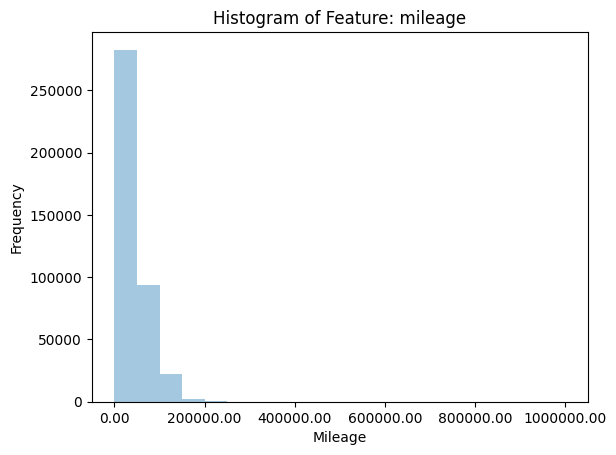

Summary statistics for feature: mileage
count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64


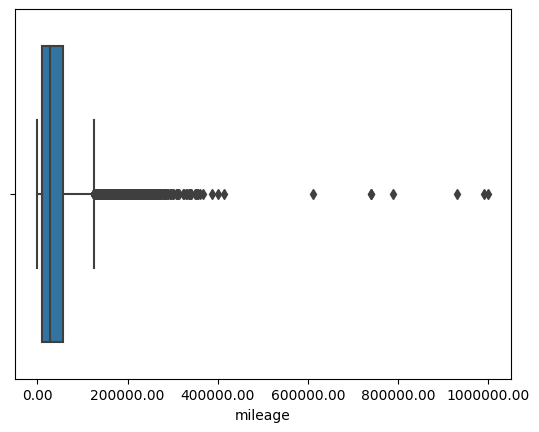

In [13]:
dummy =df.copy()
feature = 'mileage'
# Create a histogram of the data
sns.distplot(dummy[feature], kde=False, bins=20)

# Add labels and show plot
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.title('Histogram of Feature: ' + feature)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()

# Calculate summary statistics
print("Summary statistics for feature: "+ feature)
print(dummy[feature].describe())

sns.boxplot(x=dummy[feature])
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show();

#####**Registration Code**

In [14]:
#The new car might not have registration code, which is fine having null values.
#So we are checking only used vehicles that do not have the reg code as those are the missing values in reg_code column
df[(df['reg_code'].isna() == True) & (df['vehicle_condition'] == 'USED')]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
630,202010275479166,54000.0,NaN,White,Toyota,Prius+,USED,2019.0,10900,MPV,False,Petrol Hybrid
682,202006019703585,103450.0,NaN,Bronze,BMW,3 Series,USED,2006.0,6000,Convertible,False,Petrol
1131,202009274274693,74000.0,NaN,Silver,Mercedes-Benz,SL Class,USED,2004.0,15950,Convertible,False,Petrol
1194,202010114878094,13000.0,NaN,White,Ferrari,599,USED,2017.0,79949,Coupe,False,Petrol
1335,202004018824812,76000.0,NaN,White,Aston Martin,DB4,USED,2018.0,495000,Saloon,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
397788,202009214000713,119400.0,NaN,White,Toyota,Prius,USED,2017.0,8995,Hatchback,False,Petrol Hybrid
397947,202010265437718,147898.0,NaN,Blue,Toyota,Prado,USED,2005.0,3250,Estate,False,Diesel
398865,202010074728813,74500.0,NaN,Silver,Toyota,Sienta,USED,2020.0,4250,MPV,False,Petrol
399728,202008262969804,12812.0,NaN,Silver,Rolls-Royce,Wraith,USED,NaN,159950,Coupe,False,Petrol


Hence 608 rows are missing registration code

In [15]:
df['reg_code'].unique()

array([nan, '61', '17', '16', '64', '13', '08', '19', '60', '69', '66',
       '12', '18', '65', '09', 'B', '10', '14', '03', '67', '63', '15',
       '68', '56', '20', '70', '62', '11', '05', '59', '58', 'W', '02',
       '57', '06', '52', '53', '04', 'J', '07', '55', '51', 'X', 'D', 'S',
       'Y', '54', 'H', 'K', 'E', 'L', 'V', 'M', 'G', 'T', 'N', 'P', 'A',
       'F', 'R', 'C', '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's',
       '38', 'k', '37', 'p'], dtype=object)

Some values do not correspond to the standard UK registration codes, such as '94', '85', 'CA', 'm', 'FW', '723xuu', '95', 's', '38', 'k', '37', and 'p'. These values might be errors or unique cases that need further investigation.

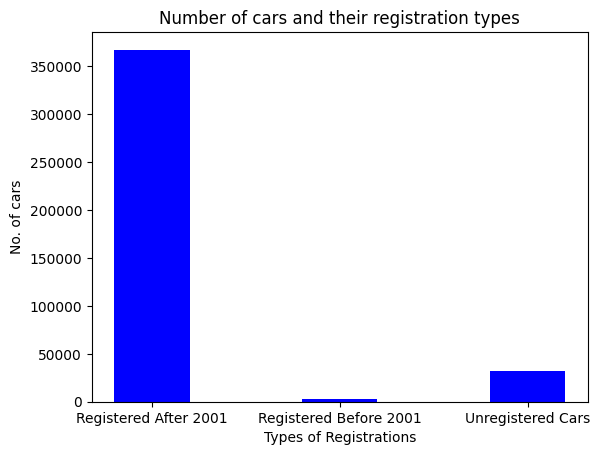

Total entries: 402005
Unregistered cars: 31857
Cars registered after 2001: 367233
Cars registered before 2001: 2915


In [16]:
df_not_null = dummy[dummy['reg_code'].notnull() == True]
df_null = dummy[dummy['reg_code'].isna() == True]
df_alpha = df_not_null[df_not_null['reg_code'].str.isdigit() == False]
df_digits = df_not_null[df_not_null['reg_code'].str.isdigit() == True]

x_label = ['Registered After 2001', 'Registered Before 2001', 'Unregistered Cars']
y_label = [df_digits["reg_code"].count(), df_alpha["reg_code"].count(), df_null['reg_code'].isna().count()]
plt.bar(x_label, y_label, color ='blue',
        width = 0.4)
plt.xlabel("Types of Registrations")
plt.ylabel("No. of cars")
plt.title("Number of cars and their registration types")
plt.show()
print("Total entries: " + str(dummy.shape[0]))
print("Unregistered cars: " + str(df_null['reg_code'].isna().count()))
print("Cars registered after 2001: " + str(df_digits["reg_code"].count()))
print("Cars registered before 2001: " + str(df_alpha["reg_code"].count()))

#####**Standard Color**

In [17]:
df[df['standard_colour'].isna() == True].shape[0]

5378

It has 5378 missing values.

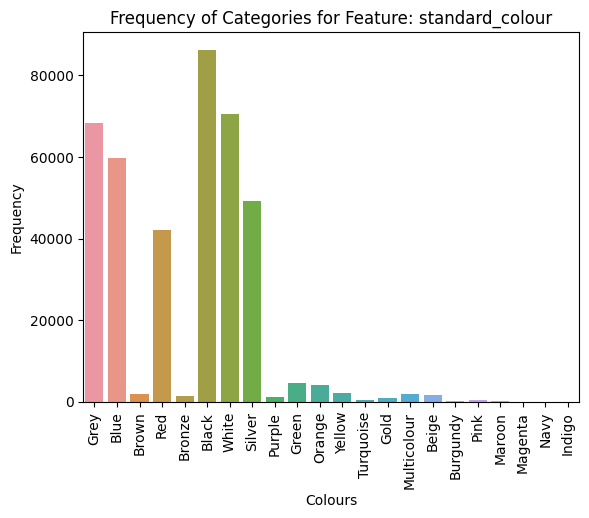

Missing values: 5378
count     396627
unique        22
top        Black
freq       86287
Name: standard_colour, dtype: object


In [18]:
# Create a bar plot of the frequency of each category
sns.countplot(x=dummy["standard_colour"])

# Add labels and show plot
plt.xlabel('Colours')
plt.ylabel('Frequency')
plt.title('Frequency of Categories for Feature: standard_colour')
plt.xticks(rotation=90)
plt.show()

print(f"Missing values: {dummy['standard_colour'].isnull().sum()}")
print(dummy['standard_colour'].describe())

#####**Standard Make**

In [19]:
df[df['standard_make'].isna() == True].shape[0]

0

No missing values found

No. of manufacturers: 110


FixedFormatter should only be used together with FixedLocator


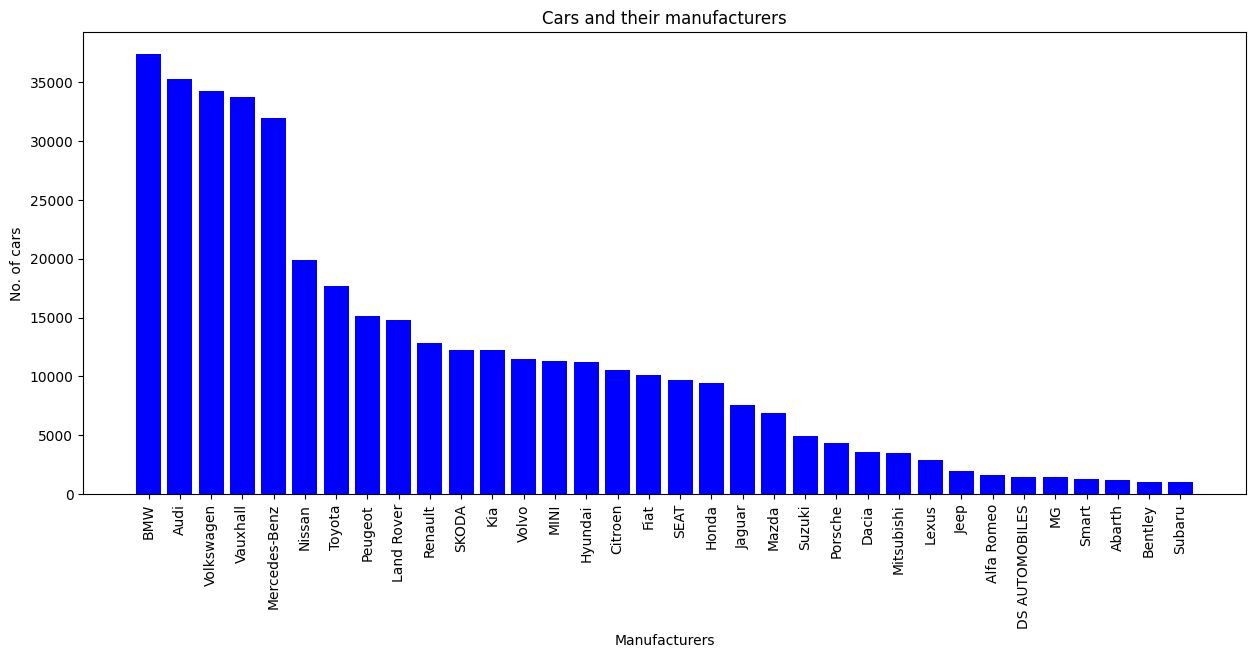

In [20]:
vc = dummy['standard_make'].value_counts()
print("No. of manufacturers: " + str(len(vc)))
vc.index = vc.index.astype(str)
vc_dict = vc.to_dict()
x_label = []
y_label = []
for key in vc_dict.keys():
    if vc_dict[key] > 1000:
        x_label.append(key)
        y_label.append(vc_dict[key])

plt.figure(figsize=(15, 6))
plt.bar(x_label, y_label, color ='blue',
        width = 0.8)
ax = plt.gca()
ax.set_xticklabels(labels=x_label,rotation=90);
plt.xlabel("Manufacturers")
plt.ylabel("No. of cars")
plt.title("Cars and their manufacturers")
plt.show()

#####**Standard Model**

In [21]:
df[df['standard_model'].isna() == True].shape[0]

0

No missing values found

#####**Vehicle Condition**

In [22]:
df[df['vehicle_condition'].isna() == True].shape[0]

0

No missing value found.

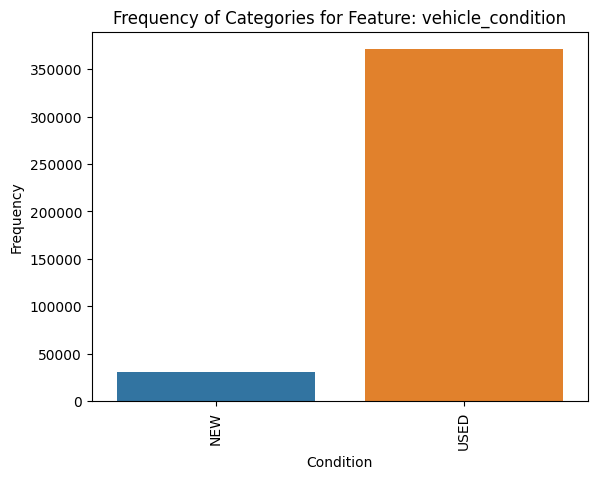

count     402005
unique         2
top         USED
freq      370756
Name: vehicle_condition, dtype: object
USED    370756
NEW      31249
Name: vehicle_condition, dtype: int64


In [23]:
# Create a bar plot of the frequency of each category
sns.countplot(x=dummy["vehicle_condition"])

# Add labels and show plot
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Frequency of Categories for Feature: vehicle_condition')
plt.xticks(rotation=90)
plt.show()

print(dummy['vehicle_condition'].describe())
print(dummy['vehicle_condition'].value_counts())

#####**Year of Registration**

In [24]:
#The new car might not have year of registration, like earlier we analyzed in registration code, which is fine having null values.
#So we are checking only used vehicles that do not have the year of registration as those are the missing values in year_of_registration column
df[(df['year_of_registration'].isna() == True) & (df['vehicle_condition'] == 'USED')]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
54,202007030806426,30000.0,18,Red,Vauxhall,Insignia,USED,NaN,11990,Hatchback,False,Petrol
83,202008222801747,42847.0,61,Red,Honda,Jazz,USED,NaN,5695,Hatchback,False,Petrol
865,202010084741550,43130.0,66,White,Land Rover,Range Rover Sport,USED,NaN,35990,SUV,False,Diesel
968,202010305607535,63369.0,17,Blue,SKODA,Rapid Spaceback,USED,NaN,7490,Hatchback,False,Diesel
1256,202010225294466,18715.0,68,White,Volvo,V40,USED,NaN,16950,NaN,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
400536,202010094805399,40523.0,NaN,Red,Peugeot,108,USED,NaN,5999,Hatchback,False,Petrol
400725,202008252905656,45.0,20,Silver,Land Rover,Range Rover Evoque,USED,NaN,46945,SUV,False,Diesel
401314,202010315635541,12522.0,67,Red,Dacia,Sandero,USED,NaN,6300,Hatchback,False,Petrol
401323,201909222504136,46000.0,13,Grey,Volkswagen,Caravelle,USED,NaN,22995,MPV,False,Diesel


2062 missing values for year of registration for used cars.

In [25]:
df['year_of_registration'].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

Erroneous values like 1007, 1015 etc.

In [26]:
df[df['year_of_registration'] < 1900].head()


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
59010,202006270588110,14000.0,07,Blue,Toyota,Prius,USED,1007.0,7000,Hatchback,False,Petrol Hybrid
69516,202010155035879,96659.0,65,Black,Audi,A4 Avant,USED,1515.0,10385,Estate,False,Diesel
84501,202009163810376,37771.0,63,Black,Smart,fortwo,USED,1063.0,4785,Coupe,False,Petrol
114737,202008102305925,30000.0,59,Red,Toyota,AYGO,USED,1009.0,4695,Hatchback,False,Petrol
120858,202010064654489,27200.0,66,Black,MINI,Clubman,USED,1016.0,18990,Estate,False,Diesel


The first record in the example above has 1007 in the year_of_registration column. We can use the reg_code to find out the correct year of registration. The 07 in the reg_code column means that the correct year of registration is 2007. The same method can be used to find the correct year of registration for other entries as well.


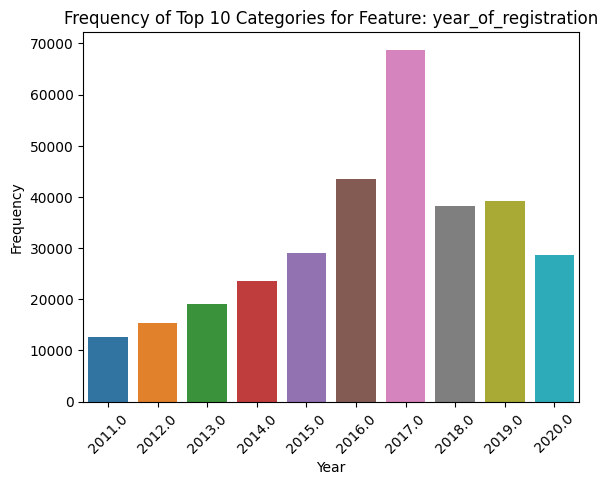

Summary statistics for feature: year_of_registration
count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64


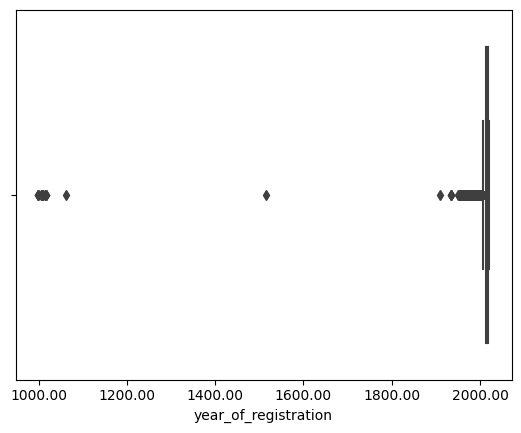

2017.0    68790
2016.0    43483
2019.0    39236
2018.0    38300
2015.0    29019
          ...  
1018.0        1
1006.0        1
1008.0        1
1515.0        1
1015.0        1
Name: year_of_registration, Length: 84, dtype: int64

In [27]:
feature = 'year_of_registration'
top_10 = dummy[feature].value_counts().head(10)

# Create a bar plot of the frequency of each category
sns.barplot(x=top_10.index, y=top_10.values)

# Add labels and show plot
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Frequency of Top 10 Categories for Feature: ' + feature)
plt.show()

# Calculate summary statistics
print("Summary statistics for feature: "+ feature)
print(dummy[feature].describe())

sns.boxplot(x=dummy[feature])
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()

vc = dummy['year_of_registration'].value_counts()
vc.sort_values(ascending=False)

#####**Body Type**

In [28]:
df[df['body_type'].isna() == True]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
307,202010245377951,33287.0,63,Red,Volkswagen,Caddy,USED,2013.0,10990,NaN,False,Diesel
625,202010255419023,55000.0,65,Grey,Vauxhall,Vivaro,USED,2015.0,10995,NaN,False,Diesel
1256,202010225294466,18715.0,68,White,Volvo,V40,USED,NaN,16950,NaN,False,Petrol
1643,202010305596351,24920.0,17,Blue,BMW,4 Series,USED,2017.0,21980,NaN,False,Diesel
1929,202010155047896,10.0,70,Blue,Lotus,Elise,USED,2020.0,47775,NaN,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
399677,202007111130539,5001.0,20,Black,Mercedes-Benz,GLC Class,USED,2020.0,36870,NaN,False,Diesel
400624,202010285545599,322000.0,05,Black,London Taxis International,TXI,USED,2005.0,995,NaN,False,Diesel
400643,202011015665976,10.0,NaN,White,Audi,A3,NEW,NaN,27845,NaN,False,Petrol
400724,202008242879192,0.0,L,Silver,Porsche,911,USED,1973.0,175000,NaN,False,Petrol


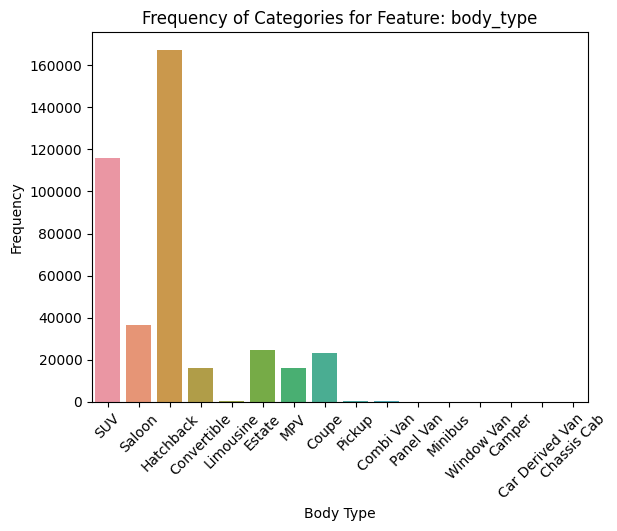

In [29]:
# Create a bar plot of the frequency of each body type
sns.countplot(x=dummy["body_type"])

# Add labels and show plot
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.title('Frequency of Categories for Feature: body_type')
plt.xticks(rotation=45)
plt.show()

#####**Crossover Car and Van**

In [30]:
df[df['crossover_car_and_van'].isna() == True].shape[0]

0

No missing value found.

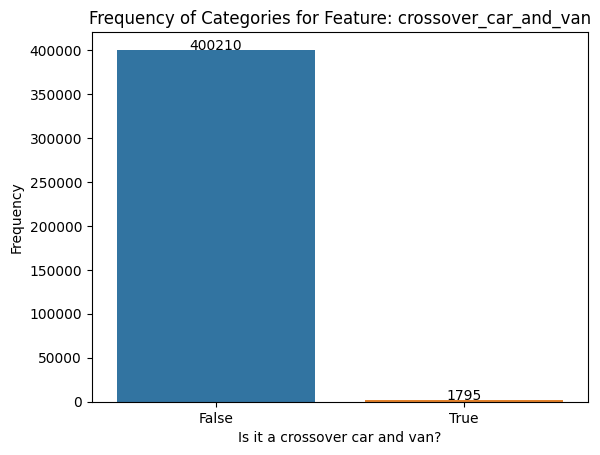

In [31]:
# Create a bar plot of the frequency of each body type
ax = sns.countplot(x=dummy["crossover_car_and_van"])

# Add labels and show plot
plt.xlabel('Is it a crossover car and van?')
plt.ylabel('Frequency')
plt.title('Frequency of Categories for Feature: crossover_car_and_van')

# Get the frequency of each value in the feature column
value_counts = dummy["crossover_car_and_van"].value_counts()

# loop through the items and access the index and count of each bar
for i, v in value_counts.items():
    ax.text(i, v, v, ha='center')
    
plt.show()

#####**Fuel Type**

In [32]:
print(f"{df[df['fuel_type'].isna() == True].shape[0]} records have null values in fuel_type column")
df[df['fuel_type'].isna() == True]

601 records have null values in fuel_type column


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1309,202010305621511,10.0,NaN,Black,BMW,5 Series,NEW,NaN,51395,Estate,False,NaN
2059,202003128359933,0.0,NaN,NaN,Jaguar,XF,NEW,NaN,35990,Estate,False,NaN
2666,202010305598848,10.0,NaN,Grey,Volvo,V60,NEW,NaN,31414,Estate,False,NaN
3724,202005129287540,61568.0,14,Silver,Toyota,Prius,USED,2020.0,7995,Hatchback,False,NaN
4027,202010295581781,10.0,NaN,Black,Mercedes-Benz,A Class,NEW,NaN,36584,Hatchback,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
398867,202010074730787,0.0,NaN,NaN,Jaguar,XF,NEW,NaN,32585,Saloon,False,NaN
399004,202010315654843,1.0,NaN,Black,Peugeot,508,NEW,NaN,39135,Hatchback,False,NaN
399025,202005289599976,17.0,19,NaN,McLaren,Senna,USED,2019.0,799900,NaN,False,NaN
399736,202009033258549,10.0,NaN,Black,Vauxhall,Grandland X,NEW,NaN,31190,SUV,False,NaN


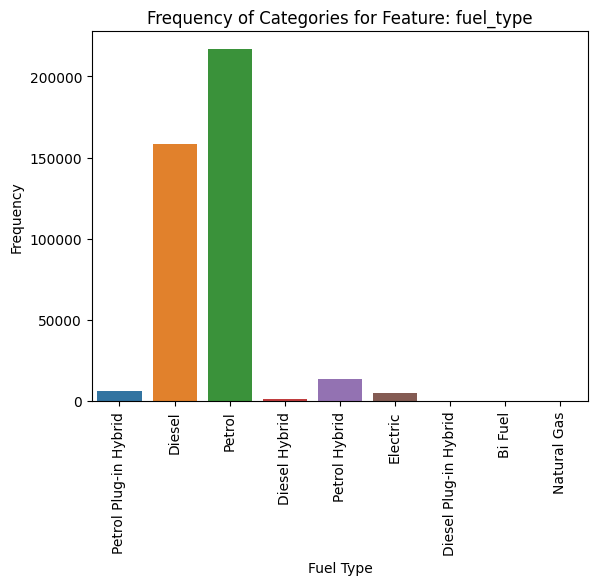

In [33]:
# Create a bar plot of the frequency of each body type
ax = sns.countplot(x=dummy["fuel_type"])

# Add labels and show plot
plt.xlabel('Fuel Type')
plt.ylabel('Frequency')
plt.title('Frequency of Categories for Feature: fuel_type')
plt.xticks(rotation=90)

plt.show()

#####**Price**

There are no missing values in this column. Basic stat results of raw data show that there are possibly incorrect values in the dataset. These were the findings:

In [34]:
mode_val = df['price'].mode()
print(f"Mean price of vehicle: {df['price'].mean():.2f}")
print(f"Median price of vehicle: {df['price'].median():.2f}")
print(f"Mode price of vehicle: {mode_val[0]:.2f}")
print(f"Standard Deviation in price of vehicle: {df['price'].std():.2f}")
print(f"Max price of vehicle: {df['price'].max():.2f}")
print(f"Min price of vehicle: {df['price'].min():.2f}")

Mean price of vehicle: 17341.97
Median price of vehicle: 12600.00
Mode price of vehicle: 8995.00
Standard Deviation in price of vehicle: 46437.46
Max price of vehicle: 9999999.00
Min price of vehicle: 120.00


In [35]:
temp = df[df['price'] == 9999999]
print(f"Count of vehicles: {temp['price'].count()}")
temp

Count of vehicles: 6


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
141833,202007050883898,87450.0,NaN,Red,Ferrari,250,USED,NaN,9999999,Coupe,False,Petrol
147188,202009103539048,100.0,NaN,Grey,Maserati,3500,USED,NaN,9999999,Convertible,False,Petrol
252505,202008112331147,46300.0,NaN,Blue,Ferrari,275,USED,NaN,9999999,Coupe,False,Petrol
305436,201812223434109,3600.0,NaN,Grey,Lamborghini,Miura,USED,NaN,9999999,Coupe,False,Petrol
336202,202001226429470,950.0,NaN,Black,Ferrari,LaFerrari,USED,NaN,9999999,Coupe,False,Petrol
336536,202006180262926,4400.0,NaN,White,Porsche,959,USED,NaN,9999999,Coupe,False,Petrol


The entries with price = 9,999,999 are missing with reg_code and year_of_registration values as well. So we can discard them.

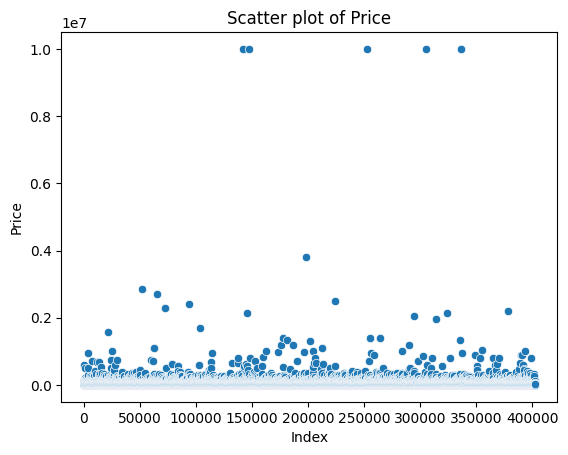

count    4.020050e+05
mean     1.734197e+04
std      4.643746e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64


In [36]:
sns.scatterplot(data=dummy, x=dummy.index, y='price')
# sns.scatterplot(data=test_df, x=test_df['mileage'], y='price')

# Add labels and show plot
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Scatter plot of Price')
plt.show()

print(dummy['price'].describe())

###**Dealing with Erroneous, Missing Values and Outliers**

Firstly, removing the six records that had 9,999,999 in the price column. This was due to the erroneous price and the missing year of registration and registration code of these records.

In [37]:
# this statement drops the six records with the missing values and the erroneous price
df.drop(df[df['price'] == 9999999].index, inplace=True)
df.reset_index(drop = True)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
401994,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
401995,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
401996,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
401997,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol


To handle missing values in our dataset, we will be using mean, median and mode to fill them. The decision to use either mean, median or mode will depend on the type of data and skewness. 
- Categorical variables can be filled using the mode value of the column.
- If the feature is numeric and the data is not skewed, the mean can be used to fill the null values.
- Otherwise, we are going to use the median.


Three columns (standard_colour, body_type, fuel_type) are categorial which need to be filled with the missing values. Hence, we will find the mode of respective column and fill the missing values with it.

In [38]:
print("Mode of standard_colour: " + str(df['standard_colour'].mode()[0]))
print("\nMode of body_type: " + str(df['body_type'].mode()[0]))
print("\nMode of fuel_type: " + str(df['fuel_type'].mode()[0]))

Mode of standard_colour: Black

Mode of body_type: Hatchback

Mode of fuel_type: Petrol


In [39]:
df.fillna({ 'standard_colour': str(df['standard_colour'].mode()[0]), 'body_type': str(df['body_type'].mode()[0]), 'fuel_type': str(df['fuel_type'].mode()[0])},inplace=True)

Filling the year of registration by reg_code, but we can not do the vice versa as we also need the months with a year of registration to use it to fill reg_code since the reg_code age identifier, changes twice a year, on the 1st of March and September.

In [40]:
# Fixing year_of_registration column
reg_code_mapping = {
    'A': 1983, 'B': 1984, 'C': 1985, 'D': 1986, 'E': 1987, 'F': 1988,'G': 1989, 'H': 1990, 'J': 1991, 'K': 1992, 'L': 1993, 'M': 1994,
    'N': 1995, 'P': 1996, 'R': 1997, 'S': 1998, 'T': 1999, 'V': 2000,'W': 2000, 'X': 2000, 'Y': 2001,
    '02': 2002,'03': 2003,'04': 2004,'05': 2005,'06': 2006,'07': 2007,'08': 2008,'09': 2009,
    '10': 2010,'11': 2011,'12': 2012,'13': 2013,'14': 2014,'15': 2015,'16': 2016,'17': 2017,'18': 2018,'19': 2019,'20': 2020,
    '51': 2001,'52': 2002, '53': 2003,'54': 2004,'55': 2005,'56': 2006,'57': 2007,'58': 2008,'59': 2009,
    '60': 2010,'61': 2011,'62': 2012,'63': 2013,'64': 2014,'65': 2015,'66': 2016,'67': 2017,'68': 2018,'69': 2019,'70': 2020
}

for index, row in df.iterrows():
    if row['reg_code'] in reg_code_mapping:
        df.at[index, 'year_of_registration'] = reg_code_mapping[row['reg_code']]

We can fill the reg_code with year of registration assuming that the cars were registered between march-August. Thats the most nearest value an better than filling the reg_code with mode.

In [41]:
def year_to_reg_code(x):
    str_x = str(x)
    decimal_position = str_x.find('.')
    if decimal_position != -1:
        return (str_x[decimal_position - 2: decimal_position])
    else:
        return None

In [42]:
for index, row in df.iterrows():
    if pd.isnull(row['reg_code']) and row['vehicle_condition'] == 'USED' and pd.notnull(row['year_of_registration']):
        df.at[index, 'reg_code'] = year_to_reg_code(row['year_of_registration'])

In [43]:
df[(df['reg_code'].isna()==True) & (df['year_of_registration'].isna()==False) ]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type


Running some analysis to check for skewness in our mileage and year_of_registration
column.

In [44]:
print("Records with null mileage value: " + str(df[df["mileage"].isna() == True].shape[0]))
print("Skewness in mileage column: " + 
      str(df['mileage'].skew(axis=0, skipna=True).round(decimals=2)))
# As the mileage column is skewed, we will need to use median to fill the NaN (null) values
print(df['mileage'].median())   # mileage median

Records with null mileage value: 127
Skewness in mileage column: 1.45
28630.0


In [45]:
print("Records with null year_of_registration value: " 
      + str(df[(df["year_of_registration"].isna() == True) 
                    & (df["vehicle_condition"] == "USED")].shape[0]))
print("Skewness in year_of_registration column: " + 
      str(df['year_of_registration'].skew(axis=0, skipna=True).round(decimals=2)))
# As the year_of_registration column is skewed, we will need to use median to fill the NaN (null) values
print(df['year_of_registration'].median())

Records with null year_of_registration value: 324
Skewness in year_of_registration column: -1.95
2016.0


In [46]:
for index, row in df.iterrows():
    if pd.isnull(row['year_of_registration']) and row['vehicle_condition'] == 'USED':
        df.at[index, 'year_of_registration'] = 2016

In [47]:
df[(df['reg_code'].isna()==True) & (df['year_of_registration'].isna()==False) ]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1510,202010054642656,13406.0,NaN,White,Land Rover,Range Rover Evoque,USED,2016.0,26000,Coupe,False,Diesel
2631,202010235350805,1000.0,NaN,Blue,Maserati,Levante,USED,2016.0,63995,SUV,False,Petrol
4766,202003238706011,NaN,NaN,Grey,Subaru,Outback,USED,2016.0,35995,Estate,False,Petrol
6998,202010225284269,160.0,NaN,Grey,McLaren,Senna,USED,2016.0,699950,Coupe,False,Petrol
7517,202009234093511,11413.0,NaN,Black,MINI,Convertible,USED,2016.0,14400,Convertible,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
392499,202010064681927,83555.0,NaN,Black,Land Rover,Range Rover Sport,USED,2016.0,30995,SUV,False,Diesel
392730,202009093528195,38796.0,NaN,Grey,Rover,110,USED,2016.0,3150,Saloon,False,Petrol
396985,202001256559400,29000.0,NaN,Black,Lamborghini,Gallardo,USED,2016.0,77990,Coupe,False,Petrol
399728,202008262969804,12812.0,NaN,Silver,Rolls-Royce,Wraith,USED,2016.0,159950,Coupe,False,Petrol


In [48]:
for index, row in df.iterrows():
    if pd.isnull(row['reg_code']) and row['vehicle_condition'] == 'USED' and pd.notnull(row['year_of_registration']):
        df.at[index, 'reg_code'] = year_to_reg_code(row['year_of_registration'])

In [49]:
df[(df['reg_code'].isna()==True) & (df['year_of_registration'].isna()==False) ]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type


In [50]:
df.fillna({'mileage': df['mileage'].median()},inplace = True)

In [51]:
df.isnull().sum()

public_reference             0
mileage                      0
reg_code                 31249
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     31249
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

In [52]:
df[df["year_of_registration"]<1900]["year_of_registration"].value_counts().sum()

0

through the reg code mapping, we have replaced the erroneous values like 1007 1015 in year of registration. 

In [53]:
print(len(df[(df['year_of_registration'].isna() == True) & (df['vehicle_condition'] == 'NEW')]))
print(len(df[(df['reg_code'].isna() == True) & (df['vehicle_condition'] == 'NEW')]))


31249
31249


so the remaining left NAN values for year of registration and reg_code are of those which are new vehicles so we can fill those with current year.

In [54]:
df['year_of_registration'].describe()

count    370750.000000
mean       2014.980690
std           4.240804
min        1933.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64

In [55]:
df['reg_code']=df['reg_code'].fillna('23')
df['year_of_registration']=df['year_of_registration'].fillna(2023)

In [56]:
df[df.isna().any(axis=1)]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type


In [57]:
df['reg_code'] = df['reg_code'].astype(str)

df['year_of_registration'] = df['year_of_registration'].astype('Int64')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401999 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401999 non-null  int64  
 1   mileage                401999 non-null  float64
 2   reg_code               401999 non-null  object 
 3   standard_colour        401999 non-null  object 
 4   standard_make          401999 non-null  object 
 5   standard_model         401999 non-null  object 
 6   vehicle_condition      401999 non-null  object 
 7   year_of_registration   401999 non-null  Int64  
 8   price                  401999 non-null  int64  
 9   body_type              401999 non-null  object 
 10  crossover_car_and_van  401999 non-null  bool   
 11  fuel_type              401999 non-null  object 
dtypes: Int64(1), bool(1), float64(1), int64(2), object(7)
memory usage: 45.6+ MB


In [59]:
# Calculate Interquartile Range for mileage and price to deal with outliers
mileage_Q1 = df['mileage'].quantile(0.25)
mileage_Q3 = df['mileage'].quantile(0.75)
mileage_IQR = mileage_Q3 - mileage_Q1

price_Q1 = df['price'].quantile(0.25)
price_Q3 = df['price'].quantile(0.75)
price_IQR = price_Q3 - price_Q1

# Find the lower and upper bounds for outliers
mileage_lower_bound = mileage_Q1 - 1.5 * mileage_IQR
mileage_upper_bound = mileage_Q3 + 1.5 * mileage_IQR

price_lower_bound = price_Q1 - 1.5 * price_IQR
price_upper_bound = price_Q3 + 1.5 * price_IQR

# Filter out the outliers in mileage and price
df = df[(df['mileage'] > mileage_lower_bound) & (df['mileage'] < mileage_upper_bound) & (df['price'] > price_lower_bound) & (df['price'] < price_upper_bound)]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367557 entries, 1 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       367557 non-null  int64  
 1   mileage                367557 non-null  float64
 2   reg_code               367557 non-null  object 
 3   standard_colour        367557 non-null  object 
 4   standard_make          367557 non-null  object 
 5   standard_model         367557 non-null  object 
 6   vehicle_condition      367557 non-null  object 
 7   year_of_registration   367557 non-null  Int64  
 8   price                  367557 non-null  int64  
 9   body_type              367557 non-null  object 
 10  crossover_car_and_van  367557 non-null  bool   
 11  fuel_type              367557 non-null  object 
dtypes: Int64(1), bool(1), float64(1), int64(2), object(7)
memory usage: 34.4+ MB


###**Encoding Categorical Columns**

In [61]:
def encoder_function(feature_name: str, df):
    encoder = OrdinalEncoder()
    df[feature_name] = encoder.fit_transform(df[feature_name].values.reshape(-1,1))

In [62]:
categorical_features = ['reg_code','standard_colour','standard_make','standard_model','vehicle_condition','body_type','fuel_type']

In [63]:
for col in categorical_features:
  encoder_function(col, df)

In [64]:
# def custom_encoding(data, column):
#     # Create a copy of the DataFrame to avoid modifying the original one
#     data_copy = data.copy()

#     # Find the top 10 most frequent categories for the given column
#     top_10_occurring_cat = data_copy[column].value_counts().sort_values(ascending=False).head(10).index
    
#     # Create 10 binary variables for each category
#     for cat in top_10_occurring_cat:
#         data_copy[f"{column}_{cat}"] = np.where(data_copy[column] == cat, 1, 0)

#     return data_copy

In [65]:
# #categorical_features = list(df.select_dtypes(include=['object']).columns)
# for col in categorical_features:
#   df = custom_encoding(df, col)

# df.drop(categorical_features, axis=1, inplace=True)

###**Rescaling Data**

In [66]:
dataset_normalized=df.copy(deep=True)
dataset_normalized['mileage'] = (dataset_normalized['mileage'] - dataset_normalized['mileage'].min()) / (dataset_normalized['mileage'].max() - dataset_normalized['mileage'].min())    
dataset_normalized['price'] = (dataset_normalized['price'] - dataset_normalized['price'].min()) / (dataset_normalized['price'].max() - dataset_normalized['price'].min())   

###**Split Data into Predictors and Target**

In [67]:
X = dataset_normalized.drop(['price','public_reference'], axis=1)
y = dataset_normalized['price']

###**Obtain train/validation/test folds**

In [68]:
# Split data into train, validation, and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#**2. Feature Engineering**

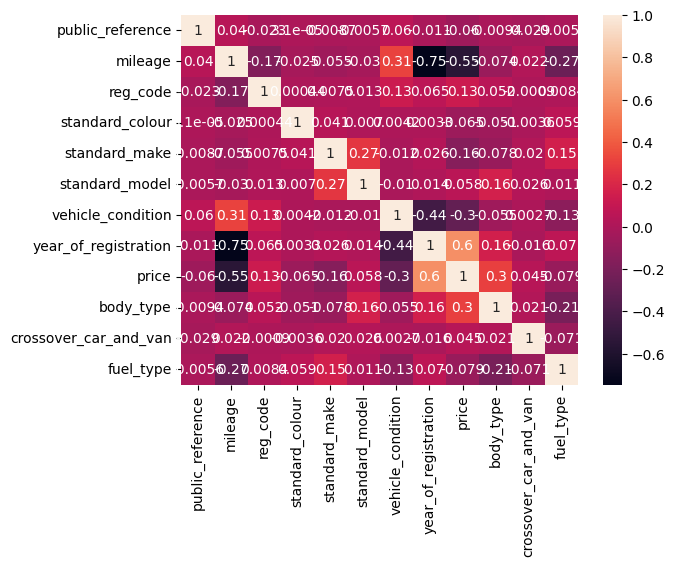

In [69]:
corr = dataset_normalized.corr(numeric_only=True)
# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True)
# Show the plot
plt.show();

###**Mileage Type**

In [70]:
df['mileage'].describe()

count    367557.000000
mean      37236.438699
std       30819.251501
min           0.000000
25%       12263.000000
50%       30000.000000
75%       56837.000000
max      126365.000000
Name: mileage, dtype: float64

In [71]:
def categorize_mileage(mileage):
    if mileage < 0.3:
        return 0  #low
    elif mileage >= 0.3 and mileage < 0.6:
        return 1  #medium
    else:
        return 2  #high

###**Vehicle Age**

In [72]:
def vehicle_age_calculation(year_of_registration):
    if pd.isnull(year_of_registration):
        return 0
    else:
        return (2023-year_of_registration)

###**Polynomial and interaction features**

In [73]:
numeric_features = ['mileage','vehicle_age']

In [74]:
poly_int_pipe = Pipeline(
    steps=[
        ("poly_int", PolynomialFeatures(degree=2, include_bias=False))  ]
).set_output(transform='pandas')
poly_int_pipe

Pipeline(steps=[('poly_int', PolynomialFeatures(include_bias=False))])

In [75]:
def polyintfeatures(df):
    poly_int_features=poly_int_pipe.fit_transform(df[numeric_features])
    poly_int_features.drop(numeric_features,axis=1, inplace=True)
    poly_int_features = poly_int_features.reset_index(drop=True)
    df = df.reset_index(drop=True)
    df = pd.concat([df,poly_int_features], axis=1)
    return df

In [76]:
class FeatureEngineering(BaseEstimator, TransformerMixin):
  def __init__(self):
    print('')

  def fit(self, X, y = None):
    return self

  def transform(self, X, y = None):
    X_trans = X.copy() # creating a copy to avoid changes to original dataset
    X_trans['mileage_type'] = X_trans['mileage'].apply(categorize_mileage)
    X_trans['vehicle_age'] = X_trans['year_of_registration'].apply(vehicle_age_calculation)
    X_trans = polyintfeatures(X_trans)
    return X_trans

#**3. Feature Selection and Dimensionality Reduction**

There are some features in our dataset that can be dropped as they do not provide much insight into whether they have any correlation with the price of vehicles on sale. Hence, some of the columns will be dropped from the dataset.

**Removing the data on domain knowledge**

In [77]:
class drop_features(BaseEstimator, TransformerMixin):
  def __init__(self):
    print('')

  def fit(self, X, y = None):
    return self

  def transform(self, X, y = None):
    X_trans = X.copy() # creating a copy to avoid changes to original dataset
    X_trans = X.drop([ 'reg_code', 'crossover_car_and_van'], axis=1)
    return X_trans

In [78]:
# class RemoveCorrelatedFeatures(BaseEstimator, TransformerMixin):
#     def __init__(self, threshold=0.95):
#         self.threshold = threshold

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X, y=None):
#         X = pd.DataFrame(X)
#         corr_matrix = X.corr().abs()
#         upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#         to_drop = [column for column in upper.columns if any(upper[column] > self.threshold)]
#         return X.drop(X.columns[to_drop], axis=1, inplace=True)

In [79]:
def remove_correlated_features(X_train):
    X_train = pd.DataFrame(X_train)
    corr_matrix = X_train.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    return X_train.drop(X_train.columns[to_drop], axis=1)


Creating a pipeline

In [80]:
pipe= Pipeline([
    ('feature_engineering',FeatureEngineering() ),
    ('drop_features', drop_features()),
    ('feature_selection_variance', VarianceThreshold()),
    ('feature_selection_correlation',FunctionTransformer(remove_correlated_features) ),
    #("featsel", SelectKBest(f_regression, k=10)),
    #("regr", Ridge(alpha=100))
    #('feature_selection_rfe', RFE(estimator=LinearRegression(), n_features_to_select=8, step=1)),
    #('feature_selection_model', SelectFromModel(estimator=LassoCV())),
    #('dimensionality_reduction', PCA(n_components=4))
])

In [81]:
pipe

Pipeline(steps=[('feature_engineering', FeatureEngineering()),
                ('drop_features', drop_features()),
                ('feature_selection_variance', VarianceThreshold()),
                ('feature_selection_correlation',
                 FunctionTransformer(func=<function remove_correlated_features at 0x7f9aa1070700>))])

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257289 entries, 201368 to 133202
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                257289 non-null  float64
 1   reg_code               257289 non-null  float64
 2   standard_colour        257289 non-null  float64
 3   standard_make          257289 non-null  float64
 4   standard_model         257289 non-null  float64
 5   vehicle_condition      257289 non-null  float64
 6   year_of_registration   257289 non-null  Int64  
 7   body_type              257289 non-null  float64
 8   crossover_car_and_van  257289 non-null  bool   
 9   fuel_type              257289 non-null  float64
dtypes: Int64(1), bool(1), float64(8)
memory usage: 20.1 MB


In [83]:
X_train_transformed = pipe.fit_transform(X_train, y_train)
X_test_transformed = pipe.transform(X_test)

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


#**4. Model Building**

In [84]:
def evaluate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean(), rmse_scores.std()

###**4.1 A Linear Model**


In [85]:
linear_model = LinearRegression()
linear_model.fit(X_train_transformed, y_train)
linear_rmse_mean, linear_rmse_std = evaluate_model(linear_model, X_train_transformed, y_train)
print(f"Linear Model: Mean RMSE: {linear_rmse_mean}, Standard Deviation: {linear_rmse_std}")

Linear Model: Mean RMSE: 0.14929622116717173, Standard Deviation: 0.0006586743843254114


In [86]:
Linear_y_pred = linear_model.predict(X_test_transformed)
linear_mae = mean_absolute_error(y_test, Linear_y_pred)
linear_mse = mean_squared_error(y_test, Linear_y_pred)
linear_rmse = mean_squared_error(y_test, Linear_y_pred, squared=False)
linear_r2 = r2_score(y_test, Linear_y_pred)
print("Mean Absolute Error:", linear_mae)
print("Mean Squared Error:", linear_mse)
print("Root Mean Squared Error:", linear_rmse)
print("R-squared:", linear_r2)

Mean Absolute Error: 0.11015289500293725
Mean Squared Error: 0.022176762359500373
Root Mean Squared Error: 0.14891864342485925
R-squared: 0.518584132999736


###**4.2 A Random Forest**

In [99]:
randomforest = RandomForestRegressor(n_estimators=100, random_state=42)

In [100]:
X_transformed_copy= X.copy()  
X_transformed_copy['mileage_type'] = X_transformed_copy['mileage'].apply(categorize_mileage)
X_transformed_copy['vehicle_age'] = X_transformed_copy['year_of_registration'].apply(vehicle_age_calculation)
X_transformed_copy = polyintfeatures(X_transformed_copy)

In [101]:
randomforest.fit(X_transformed_copy[:1000], y_train[:1000])         #for analysis

RandomForestRegressor(random_state=42)

In [89]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_transformed, y_train)
random_forest_rmse_mean, random_forest_rmse_std = evaluate_model(random_forest, X_train_transformed, y_train)
print(f"Random Forest: Mean RMSE: {random_forest_rmse_mean}, Standard Deviation: {random_forest_rmse_std}")

Random Forest: Mean RMSE: 0.05892254881960918, Standard Deviation: 0.0004695506028487416


In [90]:
rf_y_pred = random_forest.predict(X_test_transformed)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)
rf_r2 = r2_score(y_test, rf_y_pred)
print("Mean Absolute Error:", rf_mae)
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print("R-squared:", rf_r2)

Mean Absolute Error: 0.03802442897389503
Mean Squared Error: 0.0033525956595036465
Root Mean Squared Error: 0.05790160325503644
R-squared: 0.9272214437816778


In [91]:
# from scipy.stats import randint


In [92]:
# # Hyperparameter tuning with RandomizedSearchCV for Random Forest
# param_grid_rf = {
#      'n_estimators' : randint(100, 1000),
#       'max_depth'    : randint(4, 10)
# }

# rand_search_rf = RandomizedSearchCV(random_forest, param_grid_rf, cv=5,n_iter = 10, n_jobs=-1, scoring='neg_root_mean_squared_error')
# rand_search_rf.fit(X_train_transformed, y_train)
# print(f"Best Random Forest Parameters: {rand_search_rf.best_params_}")
# best_rf = rand_search_rf.best_estimator_

###**4.3 A Boosted Tree**

In [91]:
boosted_tree = GradientBoostingRegressor(n_estimators=100, random_state=42)
boosted_tree.fit(X_train_transformed, y_train)
boosted_tree_rmse_mean, boosted_tree_rmse_std = evaluate_model(boosted_tree, X_train_transformed, y_train)
print(f"Boosted Tree: Mean RMSE: {boosted_tree_rmse_mean}, Standard Deviation: {boosted_tree_rmse_std}")

Boosted Tree: Mean RMSE: 0.10089791522353724, Standard Deviation: 0.0007024001930368758


In [92]:
boostedtree_y_pred = boosted_tree.predict(X_test_transformed)
boosted_mae = mean_absolute_error(y_test, boostedtree_y_pred)
boosted_mse = mean_squared_error(y_test, boostedtree_y_pred)
boosted_rmse = mean_squared_error(y_test, boostedtree_y_pred, squared=False)
boosted_r2 = r2_score(y_test, boostedtree_y_pred)
print("Mean Absolute Error:", boosted_mae)
print("Mean Squared Error:", boosted_mse)
print("Root Mean Squared Error:", boosted_rmse)
print("R-squared:", boosted_r2)

Mean Absolute Error: 0.06945796203314109
Mean Squared Error: 0.010109618403134629
Root Mean Squared Error: 0.10054659816788745
R-squared: 0.7805391684462037


###**4.4 An Averager/Voter/Stacker Ensemble**

#####**Stacking Regressor**

In [93]:
# Stacking Ensemble
estimators = [('linear', linear_model),
            # ('rf', best_rf),
              ('rf', random_forest),
              ('gb', boosted_tree)]
stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_regressor.fit(X_train_transformed, y_train)
stacking_rmse_mean, stacking_rmse_std = evaluate_model(stacking_regressor, X_train_transformed, y_train)
print(f"Stacking Ensemble: Mean RMSE: {stacking_rmse_mean}, Standard Deviation: {stacking_rmse_std}")

Stacking Ensemble: Mean RMSE: 0.058611360969216285, Standard Deviation: 0.0004647477491735175


In [94]:
stackingRegr_y_pred = stacking_regressor.predict(X_test_transformed)
stackingRegr_mae = mean_absolute_error(y_test, stackingRegr_y_pred)
stackingRegr_mse = mean_squared_error(y_test, stackingRegr_y_pred)
stackingRegr_rmse = mean_squared_error(y_test, stackingRegr_y_pred, squared=False)
stackingRegr_r2 = r2_score(y_test, stackingRegr_y_pred)
print("Mean Absolute Error:", stackingRegr_mae)
print("Mean Squared Error:", stackingRegr_mse)
print("Root Mean Squared Error:", stackingRegr_rmse)
print("R-squared:", stackingRegr_r2)

Mean Absolute Error: 0.03800079215902855
Mean Squared Error: 0.0033190767559690823
Root Mean Squared Error: 0.057611429039463015
R-squared: 0.9279490762351625


#####**Voting Regressor**

In [95]:
voting_model = VotingRegressor([('linear', linear_model), ('rf', random_forest), ('gb', boosted_tree)])
voting_model.fit(X_train_transformed, y_train)
voting_rmse_mean, voting_rmse_std = evaluate_model(voting_model, X_train_transformed, y_train)
print(f"Voting Ensemble: Mean RMSE: {voting_rmse_mean}, Standard Deviation: {voting_rmse_std}")

Voting Ensemble: Mean RMSE: 0.08933492777005225, Standard Deviation: 0.0003421684523968673


In [ ]:
votingRegr_y_pred = voting_model.predict(X_test_transformed)
votingRegr_mae = mean_absolute_error(y_test, votingRegr_y_pred)
votingRegr_mse = mean_squared_error(y_test, votingRegr_y_pred)
votingRegr_rmse = mean_squared_error(y_test, votingRegr_y_pred, squared=False)
votingRegr_r2 = r2_score(y_test, votingRegr_y_pred)
print("Mean Absolute Error:", votingRegr_mae)
print("Mean Squared Error:", votingRegr_mse)
print("Root Mean Squared Error:", votingRegr_rmse)
print("R-squared:", votingRegr_r2)

#**5. Model Evaluation and Analysis**

In [ ]:
models = [('Linear Model', linear_model), ('Random Forest', random_forest), ('Boosted Tree', boosted_tree), ('Stacking Ensemble', stacking_regressor), ('voting Regressor', voting_model)]

In [98]:
scores = [Linear_y_pred, rf_y_pred, boostedtree_y_pred, stackingRegr_y_pred, votingRegr_y_pred]

###**5.1 Overall Performance with Cross-Validation**

In [99]:
for (name, model), y_pred in zip(models, scores):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Cross-Validation Scores:")
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r2)
    print('---------------------------------------------')

Linear Model Cross-Validation Scores:
Mean Absolute Error: 0.11015289500293725
Mean Squared Error: 0.022176762359500373
Root Mean Squared Error: 0.14891864342485925
R-squared: 0.518584132999736
---------------------------------------------
Random Forest Cross-Validation Scores:
Mean Absolute Error: 0.03802442897389503
Mean Squared Error: 0.0033525956595036465
Root Mean Squared Error: 0.05790160325503644
R-squared: 0.9272214437816778
---------------------------------------------
Boosted Tree Cross-Validation Scores:
Mean Absolute Error: 0.06945796203314109
Mean Squared Error: 0.010109618403134629
Root Mean Squared Error: 0.10054659816788745
R-squared: 0.7805391684462037
---------------------------------------------
Stacking Ensemble Cross-Validation Scores:
Mean Absolute Error: 0.03800079215902855
Mean Squared Error: 0.0033190767559690823
Root Mean Squared Error: 0.057611429039463015
R-squared: 0.9279490762351625
---------------------------------------------
voting Regressor Cross-Valid

In [100]:
# Create a list of the evaluation scores for each model
lin_reg_scores = [linear_mae, linear_mse, linear_rmse,linear_r2]
rf_scores = [rf_mae, rf_mse,rf_rmse, rf_r2]
boostedtree_scores = [boosted_mae, boosted_mse,boosted_rmse, boosted_r2]
stackingregressor_scores = [stackingRegr_mae, stackingRegr_mse,stackingRegr_rmse, stackingRegr_r2]
votingregressor_scores = [votingRegr_mae, votingRegr_mse,votingRegr_rmse, votingRegr_r2]

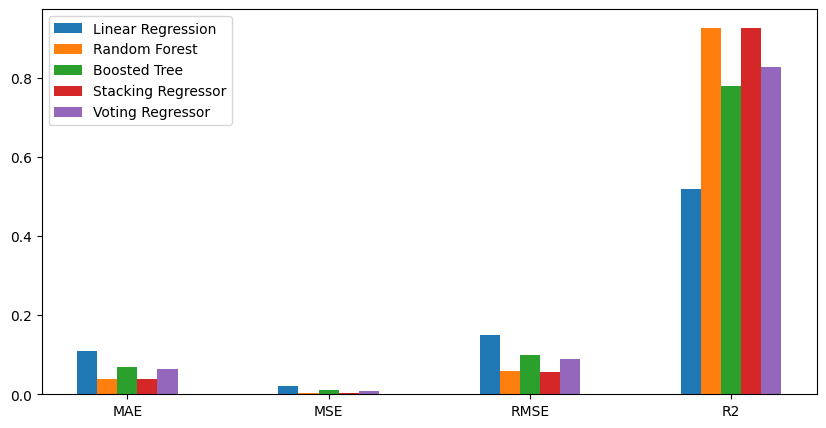

In [101]:
# Create the bar plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

# Set the bar width
bar_width = 0.2

metrics = ['MAE', 'MSE','RMSE', 'R2']

# Set the position of the bars on the x-axis
bar_pos = np.arange(len(metrics)) * (1 + bar_width * len(models))

# Create the bars
ax.bar(bar_pos, lin_reg_scores, bar_width, label='Linear Regression')
ax.bar(bar_pos + bar_width, rf_scores, bar_width, label='Random Forest')
ax.bar(bar_pos + 2 * bar_width, boostedtree_scores, bar_width, label='Boosted Tree')
ax.bar(bar_pos + 3 * bar_width, stackingregressor_scores, bar_width, label='Stacking Regressor')
ax.bar(bar_pos + 4 * bar_width, votingregressor_scores, bar_width, label='Voting Regressor')

# Set the x-axis labels
ax.set_xticks(bar_pos + 2 * bar_width)
ax.set_xticklabels(metrics)

# Add the legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
scores_df = pd.DataFrame({'MAE': [linear_mae, rf_mae, boosted_mae, stackingRegr_mae, votingRegr_mae],
                         'MSE': [linear_mse, rf_mse, boosted_mse, stackingRegr_mse, votingRegr_mse],
                         'R2': [linear_r2, rf_r2, boosted_r2, stackingRegr_r2,votingRegr_r2]},
                        index=['Linear Regression','Random Forest', 'Boosted Tree', 'Stacking Regressor', 'Voting Regressor'])

# Create the heatmap
sns.heatmap(scores_df, annot=True, cmap='coolwarm', cbar=False)

# Show the plot
plt.show()

###**5.2 True vs Predicted Analysis**

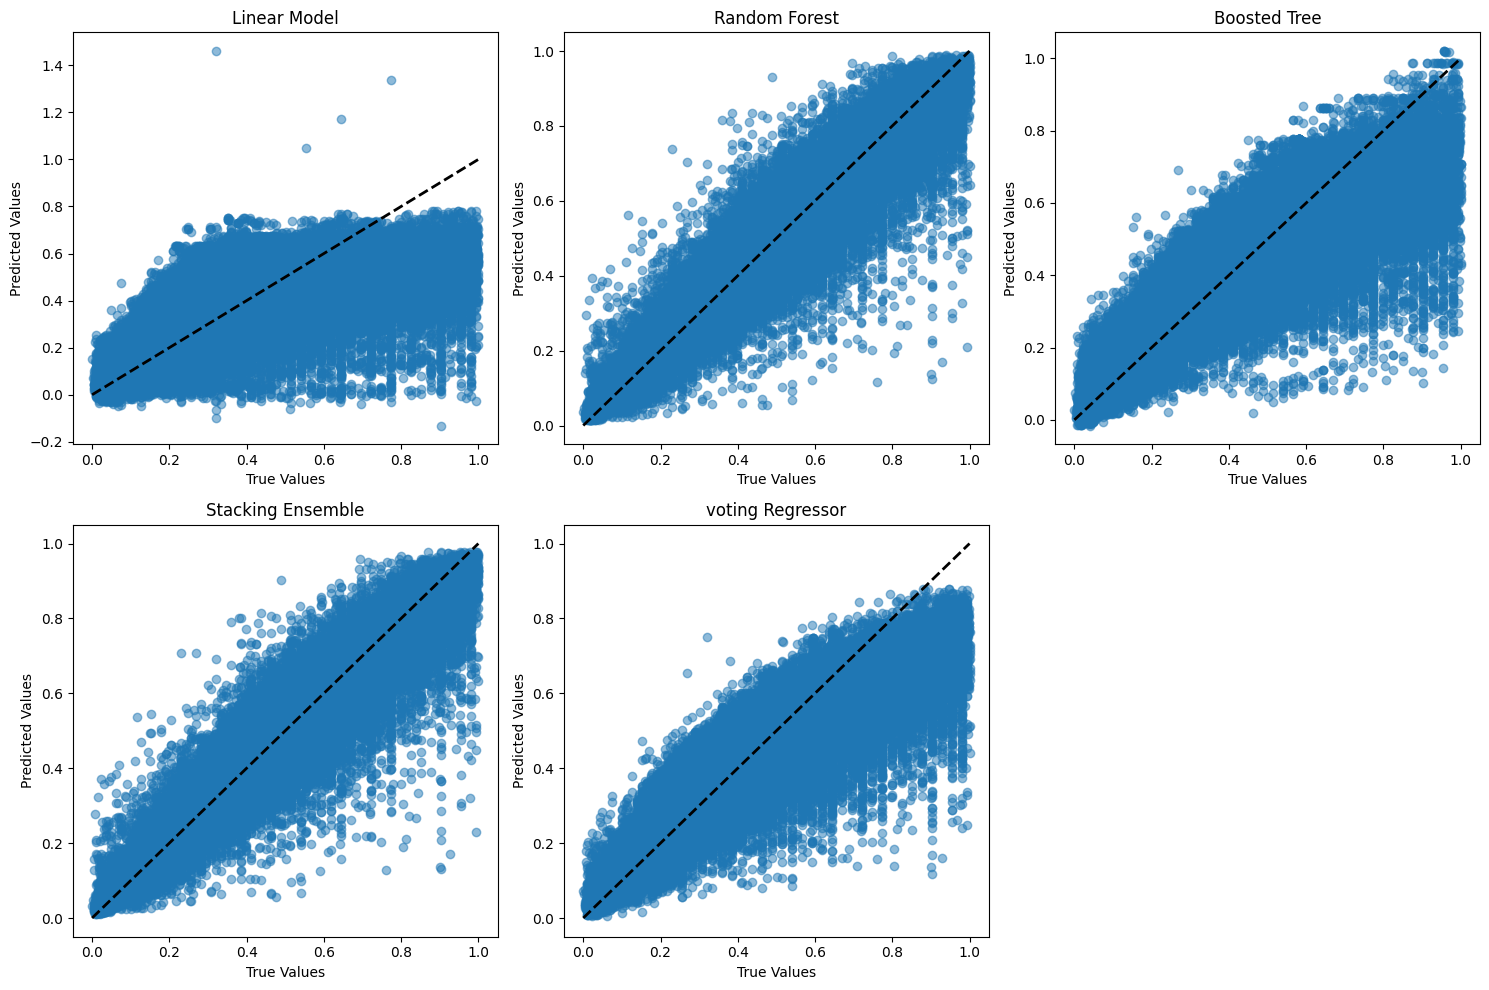

In [102]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for ax, (name, model), model_pred in zip(axes[:-1], models, scores):
    ax.scatter(y_test, model_pred, label=name, alpha=0.5)
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predicted Values')
    ax.set_title(name)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

###**5.3 Global and Local Explanations with SHAP**


In [118]:
shap.initjs()

######**Standard SHAP values**

In [102]:
explainer = shap.Explainer(randomforest)

In [103]:
shap_values = explainer(X_transformed_copy[:1000])

In [104]:
np.shape(shap_values.values)

(1000, 15)

#####**Global Explanation**

######**Absolute Mean SHAP**

It tells us which features are most important to the model.

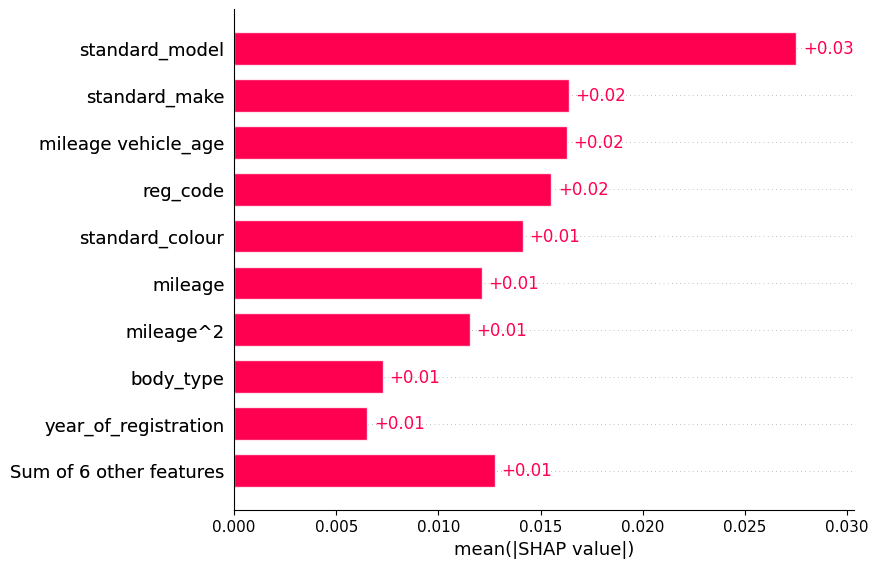

In [105]:
shap.plots.bar(shap_values)

In [111]:
# Calculate the mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values.values), axis=0)

# Create a pandas Series with feature names as the index
mean_abs_shap_values_series = pd.Series(mean_abs_shap_values, index=X_transformed_copy.columns)

# Sort the values in descending order
sorted_mean_abs_shap_values = mean_abs_shap_values_series.sort_values(ascending=False)

# Print the sorted mean absolute SHAP values
print(sorted_mean_abs_shap_values)

standard_model           0.027518
standard_make            0.016389
mileage vehicle_age      0.016281
reg_code                 0.015514
standard_colour          0.014141
mileage                  0.012132
mileage^2                0.011522
body_type                0.007286
year_of_registration     0.006528
vehicle_age              0.004209
fuel_type                0.003954
vehicle_age^2            0.003730
mileage_type             0.000641
vehicle_condition        0.000167
crossover_car_and_van    0.000051
dtype: float64


This gives us the absolute mean sharp plot. so each of these bars gives the absolute mean sharp value for that feature.  We take the absolute as we do not want and negative shap values to offset each other so each features that have made large positive or negative contributions will have a large mean shap value.  So in other words these are the features that have made significant contribution to model's predictions in this sense the mean shap plot can be sort of used as a metric for feature importance.

######**Summary Plot**

So this is a visual visualization of all of the sharp values and on the Y axis we have the values grouped by the different features and the color of the points are determined by the feature values so higher values are redder and then on the X axis we have the shap values so like with mean shap the beeswarm can be used to highlight important relationships we can see which feature have large positive or large negative shap values. In fact these features have been ordered in the same order as the mean shap plot. 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


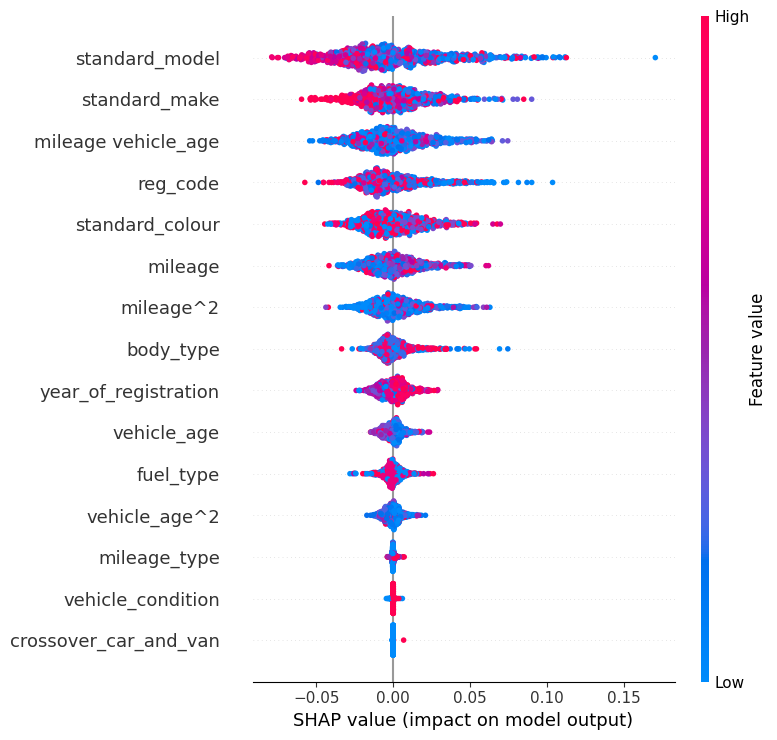

In [112]:
shap.summary_plot(shap_values, X_transformed_copy[:1000])

#####**Local Explanation**

In [121]:
!pip install --upgrade shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [141]:
shap.initjs()
#Local explanations: SHAP values for a single instance
instance_index = 9  # Change this index to explain a different instance
shap_values_instance = shap_values[instance_index]

#SHAP force plot for the single instance
shap.plots.force(shap_values_instance)

###**5.4 Partial Dependency Plots**

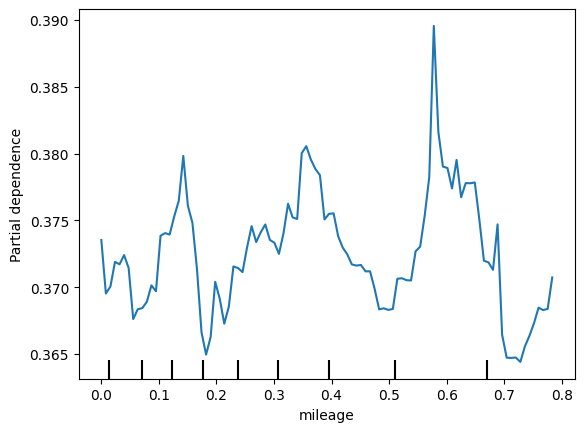

In [186]:
# features we want to create the partial dependency plots for
features = ['mileage']
# Create the partial dependency plots
display = PartialDependenceDisplay.from_estimator(
    randomforest, X_transformed_copy, features, n_jobs=-1
)

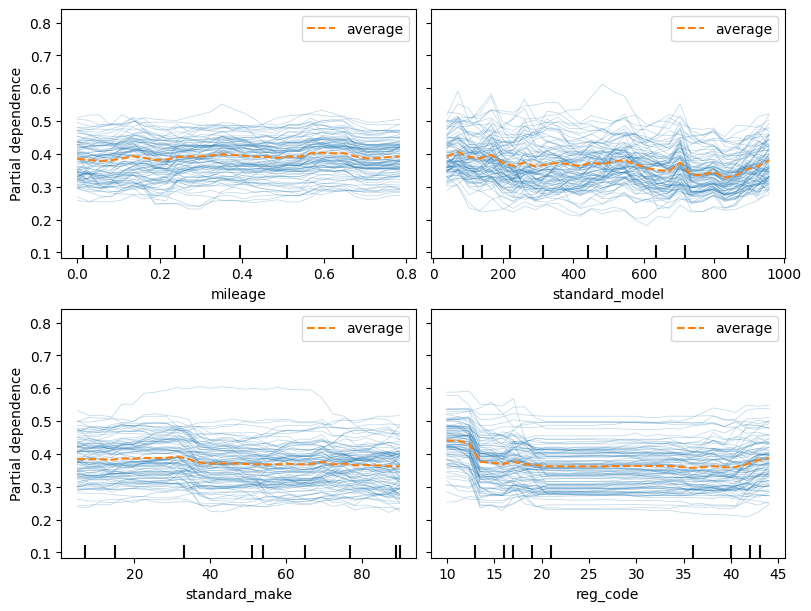

In [187]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    randomforest, X_transformed_copy, features=['mileage','standard_model', 'standard_make', 'reg_code'],kind='both',
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

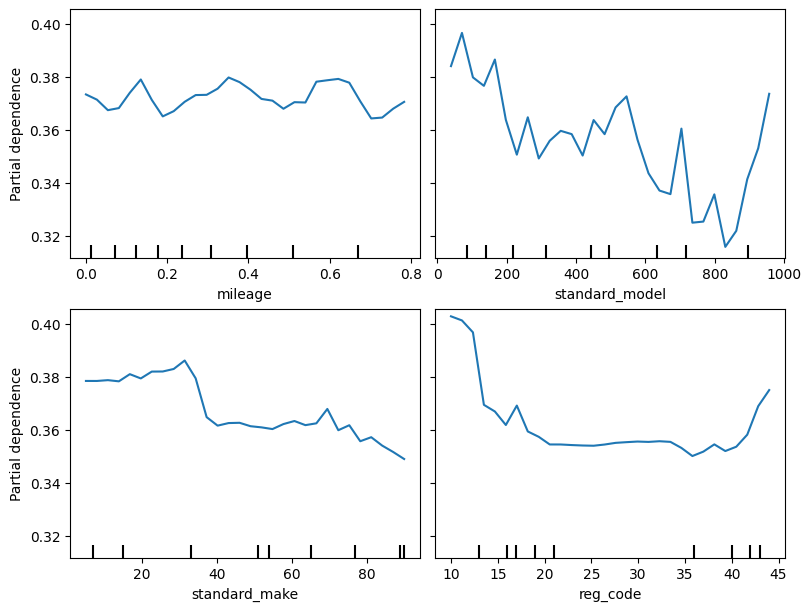

In [182]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    randomforest, X_transformed_copy, features=['mileage','standard_model', 'standard_make', 'reg_code'],
    subsample=100, grid_resolution=30, n_jobs=2, random_state=0,
    ax=ax, n_cols=2
);

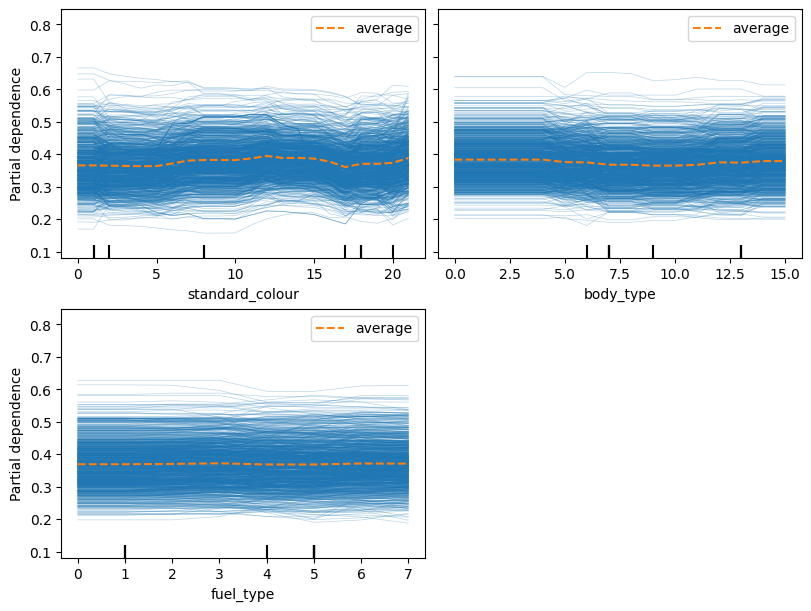

In [188]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    randomforest, X_transformed_copy, features=['standard_colour','body_type', 'fuel_type'],kind='both',
     grid_resolution=30, n_jobs=-1, random_state=0,
    ax=ax, n_cols=2
);

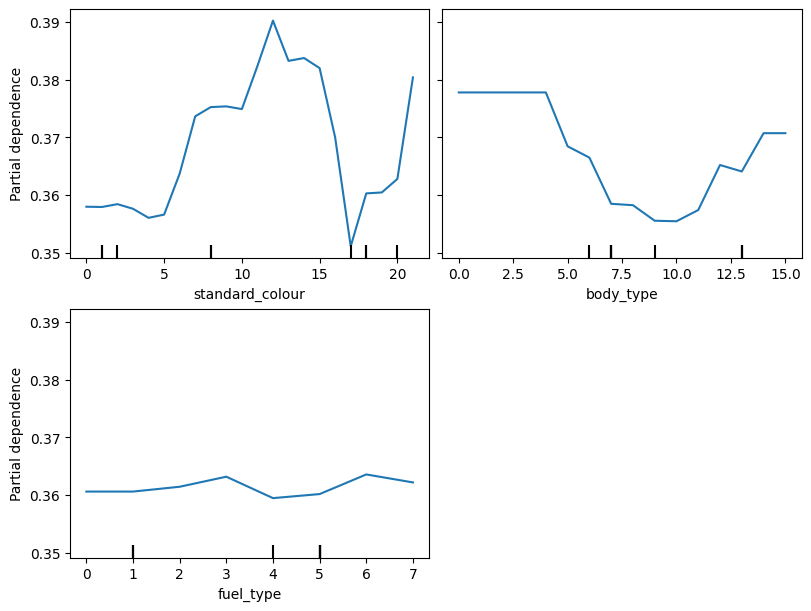

In [181]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    randomforest, X_transformed_copy, features=['standard_colour','body_type', 'fuel_type'], grid_resolution=30, n_jobs=-1, random_state=0,
    ax=ax, n_cols=2
);